In [1]:
import pandas as pd
import json
from os import listdir
from os.path import isfile, join
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.ensemble import IsolationForest
from PIL import Image
from matplotlib.ticker import FuncFormatter
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import csv
import math

In [2]:

rows = []

with open('all_player_coordinates.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name] + list(a))

#

df_trajectory = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

df_trajectory

,Player,X,Y,Z
0,Mr_PsIx0pAt,1684.78096,2622.97376,769.06496
1,Mr_PsIx0pAt,1840.16768,2641.64448,577.09032
2,Mr_PsIx0pAt,2063.71696,2689.33664,339.48888
3,Mr_PsIx0pAt,2201.91184,2755.93632,177.51614
4,Mr_PsIx0pAt,2266.91856,2769.29344,126.88819
...,...,...,...,...
203466,Luchari,973.75184,2321.50080,702.95344
203467,Luchari,890.59792,2534.75936,463.64952
203468,Luchari,805.73896,2753.64288,228.87010
203469,Luchari,766.17560,2865.87840,122.33683


In [3]:

# Step 1: Read the CSV file and create a list of rows
rows = []

with open('all_player_coordinates_landing.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name]+list(a))
    
    
#/195.3125


df = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])
df

# Assuming 'updated_df' is your original DataFrame with separate 'X', 'Y', and 'Z' columns
dff = pd.DataFrame(df)
print(dff)

# Combine 'X' and 'Y' into one column as a tuple, and keep 'Z' as a separate column
dff['XY'] = list(zip(dff['X'], dff['Y']))
dff['Z'] = dff['Z']

# Create a new DataFrame with the combined 'XY' column, 'Z', and other relevant data
new_df = dff[['XY', 'Z']].copy()

print(new_df)

               Player           X           Y           Z
0         Mr_PsIx0pAt  2326.63040  2735.11936  104.116180
1           Star_Mech  2332.66000  2736.23744  103.373950
2         Arsenyura72   797.12864  3080.89664    3.982200
3      Maverick_Wekze  2747.59296   750.06184   27.583057
4             1NoNleX  1067.33496  2122.57520   56.341635
...               ...         ...         ...         ...
40771      MASLAK1986  3197.87904  3089.78080   17.868074
40772           Zioux   624.34000  1484.15952   58.922660
40773          ePzion  1418.37344  2659.66864   58.954580
40774          MoRReM   811.04864  3002.26624   41.659917
40775         Luchari   715.76936  2984.21152   23.976445

[40776 rows x 4 columns]
                             XY           Z
0       (2326.6304, 2735.11936)  104.116180
1         (2332.66, 2736.23744)  103.373950
2       (797.12864, 3080.89664)    3.982200
3       (2747.59296, 750.06184)   27.583057
4       (1067.33496, 2122.5752)   56.341635
...           

In [4]:

# Step 1: Read the CSV file and create a list of rows
rows = []

with open('all_player_coordinates_landing_test.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name]+list(a))
    
    
#/195.3125


test = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])


# Assuming 'updated_df' is your original DataFrame with separate 'X', 'Y', and 'Z' columns
dff = pd.DataFrame(test)
# Combine 'X' and 'Y' into one column as a tuple, and keep 'Z' as a separate column
dff['XY'] = list(zip(dff['X'], dff['Y']))
dff['Z'] = dff['Z']

# Create a new DataFrame with the combined 'XY' column, 'Z', and other relevant data
test_new = dff[['XY', 'Z']].copy()

print(test_new)

                            XY           Z
0      (1627.95872, 1788.9256)   70.791840
1        (843.676, 1393.47776)   46.611290
2     (1663.81552, 1819.47936)   71.200755
3     (3100.84672, 1877.16064)   50.915025
4     (2861.21888, 1485.72032)   64.084155
...                        ...         ...
5920   (1914.68576, 1509.4624)   43.948860
5921   (2397.40192, 2909.9312)  101.235210
5922    (950.0752, 2101.68048)   37.841358
5923   (952.09416, 2106.30144)   34.765442
5924   (971.96616, 2088.42352)   37.411322

[5925 rows x 2 columns]


In [5]:

# Load the image using PIL
img = Image.open("C:/Users/robuc/Desktop/projeto/novoo/roads.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
coordinates_array = np.array(coordinates)

In [6]:

# Load the image using PIL
img = Image.open("C:/Users/robuc/Desktop/projeto/novoo/buildings.png")
# Convert the image to grayscale (though it should already be in black and white)
img_gray = img.convert("L")

# Convert the grayscale image to a numpy array
img_array = np.array(img_gray)

# Get the shape of the array to understand the dimensions of the image
shape = img_array.shape
shape

# Initialize a list to hold the coordinates
coordinates = []

# Iterate over the array and store the coordinates of the white and black pixels
for y in range(shape[0]):  # Loop over rows
    for x in range(shape[1]):  # Loop over columns
        color_value = img_array[y, x]
        if color_value == 255 or color_value == 0:  # Check if the pixel is white or black
            coordinates.append((x, y, color_value))

# Convert the list of coordinates to a numpy array for efficient storage
building_coordinates_array = np.array(coordinates)

In [7]:
building_coordinates_array

road_build = pd.DataFrame()
road_build['Building'] = building_coordinates_array[:,2]
road_build['Roads'] = coordinates_array[:,2]
road_build.corr()

,Building,Roads
Building,1.000000,-0.003463
Roads,-0.003463,1.000000


In [55]:
grid_size = 10
def calculate_nearest_road_distances(coordinates_array,grid_size):
    road_points = coordinates_array[coordinates_array[:, 2] == 255][:, :2]

    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store building counts for each grid
    grid_building_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}
    

    # Count buildings in each grid
    for x, y in road_points:
            grid_x = int(x / grid_square_size)
            grid_y = int(y / grid_square_size)
            grid_building_counts[(grid_x, grid_y)] += 1

    return grid_building_counts




updated = calculate_nearest_road_distances(coordinates_array,grid_size)
model_df = pd.DataFrame.from_dict(updated, orient='index', columns=['Road_Count'])

print(model_df)

        Road_Count
(0, 0)           0
(0, 1)         700
(0, 2)         355
(0, 3)         719
(0, 4)           0
...            ...
(9, 5)           0
(9, 6)           0
(9, 7)           0
(9, 8)           0
(9, 9)           0

[100 rows x 1 columns]


In [56]:
def count_buildings_in_grid(building_coordinates_array, grid_size):
    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store building counts for each grid
    grid_building_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count buildings in each grid
    for x, y, value in building_coordinates_array:
        if value == 255:  # Check if the pixel is marked as a building
            grid_x = int(x / grid_square_size)
            grid_y = int(y / grid_square_size)
            grid_building_counts[(grid_x, grid_y)] += 1


    return grid_building_counts


# You would call the function like this:
updated_2 = count_buildings_in_grid(building_coordinates_array, grid_size) 
model_df['Building_Count'] = updated_2
model_df

,Road_Count,Building_Count
"(0, 0)",0,43
"(0, 1)",700,561
"(0, 2)",355,204
"(0, 3)",719,247
"(0, 4)",0,28
...,...,...
"(9, 5)",0,218
"(9, 6)",0,290
"(9, 7)",0,0
"(9, 8)",0,0


In [57]:

def grid_to_center(center, grid_size):
    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store player counts for each grid
    grid = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count players in each grid
    for x in range(x_grids):
        for y in range(y_grids):
            grid_center_x = (x * grid_square_size) + (grid_square_size / 2)
            grid_center_y = (y * grid_square_size) + (grid_square_size / 2)
            distance = math.sqrt((grid_center_x - center[0])**2 + (grid_center_y - center[1])**2)
            grid[(x, y)] = distance

    return grid

updated_4=grid_to_center([2043,2043],grid_size)
model_df['Grid_Distance'] = updated_4
model_df

,Road_Count,Building_Count,Grid_Distance
"(0, 0)",0,43,2599.607370
"(0, 1)",700,561,2328.062972
"(0, 2)",355,204,2101.746950
"(0, 3)",719,247,1936.581421
"(0, 4)",0,28,1849.026576
...,...,...,...
"(9, 5)",0,218,1860.069698
"(9, 6)",0,290,1949.230515
"(9, 7)",0,0,2115.344946
"(9, 8)",0,0,2342.095899


In [58]:
def count_players_in_grid(player_coordinates_array, grid_size):
    # Calculate the number of grids along each axis
    x_grids = y_grids = grid_size

    # The size of each grid square
    grid_square_size = 4096 / grid_size

    # Create a dictionary to store player counts for each grid
    grid_player_counts = {(x, y): 0 for x in range(x_grids) for y in range(y_grids)}

    # Count players in each grid
    for x, y in player_coordinates_array:
        grid_x = min(int(x / grid_square_size), grid_size - 1)
        grid_y = min(int(y / grid_square_size), grid_size - 1)
        grid_player_counts[(grid_x, grid_y)] += 1

    return grid_player_counts

updated_3=count_players_in_grid(new_df['XY'],grid_size)
model_df['Player_Count'] = updated_3
print(model_df)

test_4=count_players_in_grid(test_new['XY'],grid_size)
test_df = model_df.copy()

test_df['Player_Count'] = test_4
test_df

        Road_Count  Building_Count  Grid_Distance  Player_Count
(0, 0)           0              43    2599.607370             0
(0, 1)         700             561    2328.062972             6
(0, 2)         355             204    2101.746950            81
(0, 3)         719             247    1936.581421            34
(0, 4)           0              28    1849.026576            23
...            ...             ...            ...           ...
(9, 5)           0             218    1860.069698            14
(9, 6)           0             290    1949.230515            12
(9, 7)           0               0    2115.344946             0
(9, 8)           0               0    2342.095899             0
(9, 9)           0               0    2613.749506             0

[100 rows x 4 columns]


,Road_Count,Building_Count,Grid_Distance,Player_Count
"(0, 0)",0,43,2599.607370,0
"(0, 1)",700,561,2328.062972,6
"(0, 2)",355,204,2101.746950,9
"(0, 3)",719,247,1936.581421,8
"(0, 4)",0,28,1849.026576,3
...,...,...,...,...
"(9, 5)",0,218,1860.069698,4
"(9, 6)",0,290,1949.230515,4
"(9, 7)",0,0,2115.344946,0
"(9, 8)",0,0,2342.095899,0


In [59]:
model_df.max()

Road_Count        2757.000000
Building_Count    3237.000000
Grid_Distance     2613.749506
Player_Count      5787.000000
dtype: float64

In [60]:
model_df = model_df.div(model_df.max())
model_df

playerrr_count = model_df['Player_Count']

In [61]:
n=test_df['Player_Count'].max()
test_df = test_df.div(test_df.max())
test_df

,Road_Count,Building_Count,Grid_Distance,Player_Count
"(0, 0)",0.000000,0.013284,0.994589,0.000000
"(0, 1)",0.253899,0.173309,0.890699,0.009820
"(0, 2)",0.128763,0.063021,0.804112,0.014730
"(0, 3)",0.260791,0.076305,0.740921,0.013093
"(0, 4)",0.000000,0.008650,0.707423,0.004910
...,...,...,...,...
"(9, 5)",0.000000,0.067346,0.711648,0.006547
"(9, 6)",0.000000,0.089589,0.745760,0.006547
"(9, 7)",0.000000,0.000000,0.809314,0.000000
"(9, 8)",0.000000,0.000000,0.896067,0.000000


In [62]:
# Define the bins and labels for categorization
bins = [i/10 for i in range(0, 11)]  # Creating bins from 0.0 to 1.0 at intervals of 0.1
print(bins)
labels = range(0, 10)  # Labels from 0 to 9 representing each 10% interval

# Categorize the Player_Count column
model_df['Player_Category'] = pd.cut(model_df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
model_df = model_df.drop('Player_Count', axis=1)
model_df


# Categorize the Player_Count column
test_df['Player_Category'] = pd.cut(test_df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
test_df = test_df.drop('Player_Count', axis=1)
test_df

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


,Road_Count,Building_Count,Grid_Distance,Player_Category
"(0, 0)",0.000000,0.013284,0.994589,0
"(0, 1)",0.253899,0.173309,0.890699,0
"(0, 2)",0.128763,0.063021,0.804112,0
"(0, 3)",0.260791,0.076305,0.740921,0
"(0, 4)",0.000000,0.008650,0.707423,0
...,...,...,...,...
"(9, 5)",0.000000,0.067346,0.711648,0
"(9, 6)",0.000000,0.089589,0.745760,0
"(9, 7)",0.000000,0.000000,0.809314,0
"(9, 8)",0.000000,0.000000,0.896067,0


In [42]:
model_df.corr()#16

,Road_Count,Building_Count,Grid_Distance,Player_Category
Road_Count,1.000000,0.377503,-0.282380,0.062536
Building_Count,0.377503,1.000000,-0.533450,0.487853
Grid_Distance,-0.282380,-0.533450,1.000000,-0.503692
Player_Category,0.062536,0.487853,-0.503692,1.000000


In [234]:
model_df.corr()#14

,Road_Count,Building_Count,Grid_Distance,Player_Category
Road_Count,1.000000,0.391489,-0.241816,0.060506
Building_Count,0.391489,1.000000,-0.450593,0.416646
Grid_Distance,-0.241816,-0.450593,1.000000,-0.341459
Player_Category,0.060506,0.416646,-0.341459,1.000000


In [243]:
model_df.corr()#15

,Road_Count,Building_Count,Grid_Distance,Player_Category
Road_Count,1.000000,0.373377,-0.228232,0.131356
Building_Count,0.373377,1.000000,-0.412198,0.476590
Grid_Distance,-0.228232,-0.412198,1.000000,-0.417882
Player_Category,0.131356,0.476590,-0.417882,1.000000


In [252]:
model_df.corr()#10

,Road_Count,Building_Count,Grid_Distance,Player_Category
Road_Count,1.000000,0.377503,-0.282380,0.062536
Building_Count,0.377503,1.000000,-0.533450,0.487853
Grid_Distance,-0.282380,-0.533450,1.000000,-0.503692
Player_Category,0.062536,0.487853,-0.503692,1.000000


Mean Squared Error: 1.82
R-squared: 0.32937838534949704
(0, 0)    0
(0, 1)    0
(0, 2)    0
(0, 3)    0
(0, 4)    0
         ..
(9, 5)    0
(9, 6)    0
(9, 7)    0
(9, 8)    0
(9, 9)    0
Name: Player_Category, Length: 100, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 2.
 1. 1. 1. 0. 0. 1. 0. 2. 1. 1. 2. 1. 2. 0. 0. 0. 1. 1. 1. 2. 2. 2. 1. 1.
 0. 0. 0. 0. 2. 1. 2. 2. 4. 2. 1. 0. 1. 1. 1. 1. 2. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]
Total number of errors:  38 in 100
Accuracy:  62.0


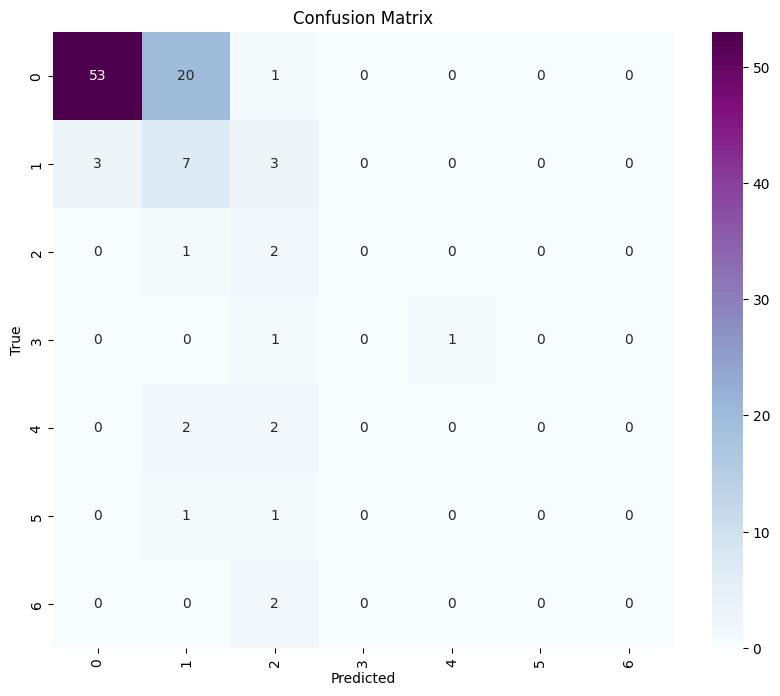

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import confusion_matrix


df = pd.DataFrame(model_df)

# Splitting the data into training and testing sets
X_train = df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_train = df['Player_Category']

df = pd.DataFrame(test_df)

# Splitting the data into training and testing sets
X_test = df[['Road_Count', 'Building_Count', 'Grid_Distance']]
y_test = df['Player_Category']



# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting Player_Count
y_pred = np.round(np.abs(model.predict(X_test)),0)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

print(y_test)
print(y_pred)

cm = confusion_matrix(y_test, y_pred)

print('Total number of errors: ', np.sum(y_test != y_pred),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == y_pred) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


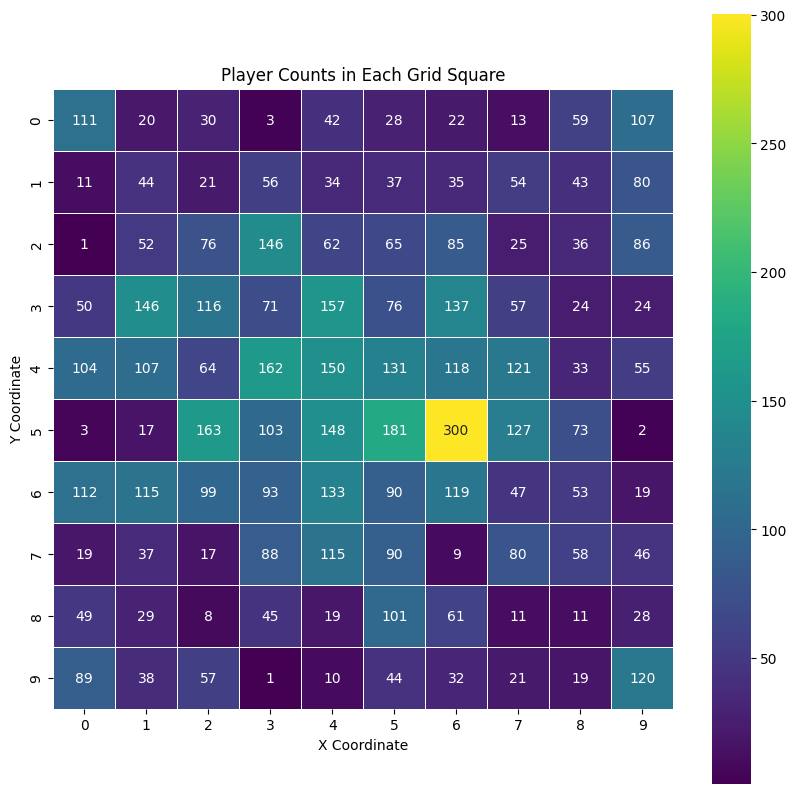

In [64]:
import numpy as np
import matplotlib.pyplot as plt


def generate_random_value(category):
    if category == 0:
        return np.random.uniform(0, 0.1)
    else:
        return np.random.uniform(category / 10, (category + 1) / 10)

player_counts = np.array([generate_random_value(cat) for cat in y_pred])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = (player_counts.reshape(grid_shape))*n

plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


In [65]:
# array=[]
# array_1=[]
# array_2=[]
# for i in range (5,100):
#     print(i)
#     updated = calculate_nearest_road_distances(coordinates_array,i)
#     model_df = pd.DataFrame()
#     model_df['Road_Count'] = updated
#     updated_2 = count_buildings_in_grid(building_coordinates_array, i) # for a 10x10 grid
#     model_df['Building_Count'] = updated_2
#     updated_4=grid_to_center([2043,2043],i)
#     model_df['Grid_Distance'] = updated_4
#     updated_3=count_players_in_grid(new_df['XY'],i)
#     model_df['Player_Count'] = updated_3
#     test_4=count_players_in_grid(test_new['XY'],i)
#     test_df = model_df.copy()
#     test_df['Player_Count'] = test_4
#     model_df = model_df.div(model_df.max())
#     test_df = test_df.div(test_df.max())

#     bins = [i/10 for i in range(0, 11)]  # Creating bins from 0.0 to 1.0 at intervals of 0.1
#     labels = range(0, 10)  # Labels from 0 to 9 representing each 10% interval

#     # Categorize the Player_Count column
#     model_df['Player_Category'] = pd.cut(model_df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
#     model_df = model_df.drop('Player_Count', axis=1)
#     model_df


#     # Categorize the Player_Count column
#     test_df['Player_Category'] = pd.cut(test_df['Player_Count'], bins=bins, labels=labels, include_lowest=True)
#     test_df = test_df.drop('Player_Count', axis=1)
#     test_df
    
    
#     df = pd.DataFrame(model_df)
#     # Splitting the data into training and testing sets
#     X_train = df[['Road_Count', 'Building_Count', 'Grid_Distance']]
#     y_train = df['Player_Category']
    
#     df = pd.DataFrame(test_df)
#     # Splitting the data into training and testing sets
#     X_test = df[['Road_Count', 'Building_Count', 'Grid_Distance']]
#     y_test = df['Player_Category']
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     y_pred = np.round(np.abs(model.predict(X_test)),0)
#     mse = mean_squared_error(y_test, y_pred)
#     array.append(mse)
#     r2 = r2_score(y_test, y_pred)
#     array_1.append(r2)
#     d=np.sum(y_test == y_pred) / len(y_test) * 100
#     array_2.append(d)

    


In [66]:
array_1.index(max(array_1))

NameError: name 'array_1' is not defined

In [ ]:
array.index(min(array))

In [ ]:
array_2.index(max(array_2))

In [171]:
array

[1.96,
 1.6666666666666667,
 1.5510204081632653,
 2.234375,
 1.5308641975308641,
 1.82,
 2.834710743801653,
 1.3819444444444444,
 1.982248520710059,
 1.096938775510204,
 1.751111111111111,
 0.74609375,
 0.8719723183391004,
 0.6450617283950617,
 0.48753462603878117,
 0.525,
 0.4489795918367347,
 0.6983471074380165,
 0.3686200378071834,
 0.4288194444444444,
 0.2848,
 0.5562130177514792,
 0.2112482853223594,
 0.5943877551020408,
 0.2057074910820452,
 0.4866666666666667,
 0.2497398543184183,
 0.3203125,
 0.31129476584022037,
 0.19550173010380623,
 0.3314285714285714,
 0.16280864197530864,
 0.1672753834915997,
 0.12257617728531855,
 0.24917817225509534,
 0.144375,
 0.40273646638905414,
 0.12528344671201813,
 0.25797728501892914,
 0.15392561983471073,
 0.23703703703703705,
 0.17958412098298676,
 0.1670439112720688,
 0.10807291666666667,
 0.11703456892961266,
 0.1208,
 0.12918108419838523,
 0.21449704142011836,
 0.08330366678533285,
 0.21776406035665294,
 0.12165289256198347,
 0.1482780612244

In [172]:
array_1

[0.7093023255813953,
 0.6333389916822272,
 0.549806576402321,
 0.42207628188936597,
 0.2936708860759494,
 0.32937838534949704,
 0.3167555643355724,
 0.20855083271190655,
 0.32429045425250047,
 0.17065202416799508,
 0.27306273062730624,
 0.18588078588078583,
 0.2247391952309986,
 0.1866825208085614,
 0.1951763275233077,
 0.15810573791029825,
 0.20108695652173902,
 0.2105700001930242,
 0.17543284679701354,
 0.169573439798277,
 0.0813377374071017,
 0.1365835099733681,
 0.18332993860389324,
 0.14561799014059484,
 0.2028654394039009,
 0.21352529008985965,
 0.1212910894710374,
 0.16419812071985984,
 0.07389596315361702,
 0.1055694781096369,
 0.05381290474777223,
 0.10084931623959714,
 0.09278454931647973,
 -0.020348036456399488,
 0.0889970194729871,
 -0.011217510259917907,
 0.08701403931006835,
 0.09063468774128258,
 0.05134611868216954,
 0.018021636857549317,
 0.0274651058081945,
 0.028770417647563384,
 0.0485472364108358,
 -0.03154718772419707,
 0.0915980891651137,
 -0.012592357140653876,


In [173]:
array_2

[36.0,
 47.22222222222222,
 34.69387755102041,
 54.6875,
 46.913580246913575,
 62.0,
 48.760330578512395,
 70.13888888888889,
 57.396449704142015,
 77.55102040816327,
 56.888888888888886,
 85.546875,
 83.39100346020761,
 90.74074074074075,
 90.30470914127424,
 91.75,
 93.87755102040816,
 88.22314049586777,
 94.89603024574669,
 90.97222222222221,
 95.84,
 93.49112426035504,
 96.29629629629629,
 93.36734693877551,
 96.19500594530321,
 93.0,
 95.73361082206036,
 95.1171875,
 95.68411386593205,
 96.88581314878893,
 95.59183673469389,
 97.91666666666666,
 95.98246895544193,
 98.26869806094183,
 95.46351084812623,
 98.625,
 95.06246281975015,
 98.24263038548753,
 96.75500270416441,
 98.34710743801654,
 97.62962962962963,
 98.10964083175804,
 97.60072430964237,
 98.56770833333334,
 98.33402748854644,
 97.76,
 98.57747020376777,
 96.93047337278107,
 98.8252046991812,
 97.8395061728395,
 98.51239669421487,
 98.53316326530613,
 98.92274546014158,
 98.45422116527944,
 99.02326917552428,
 98.36111

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2.
 1. 3. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 4. 0. 0. 0. 0. 0. 0. 5. 3. 7. 0. 0.
 0. 0. 0. 0. 1. 2. 1. 1. 3. 1. 0. 0. 0. 0. 0. 0. 3. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Random Forest MSE: 0.5
Mean Squared Error: 0.5
R-squared: 0.8157632926784333
Total number of errors:  18 in 100
Accuracy:  82.0


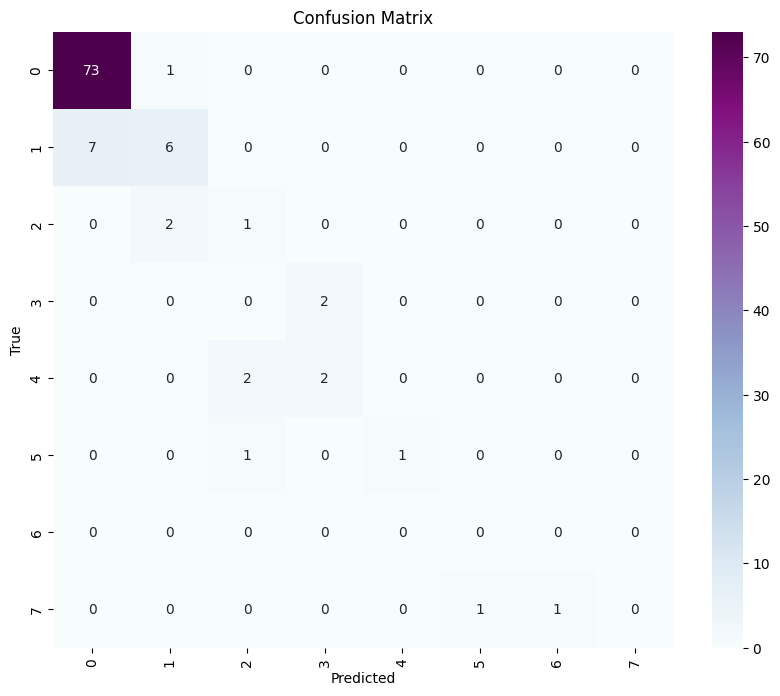

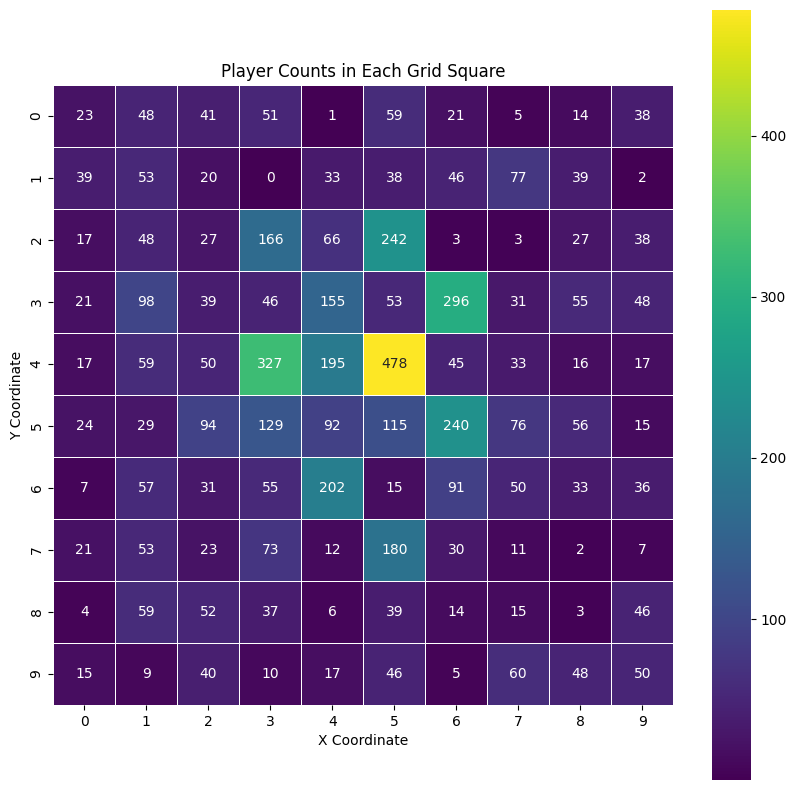

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = np.round(np.abs(rf_model.predict(X_test)),0)
print(rf_predictions)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)
r2 = r2_score(y_test, rf_predictions)

print("Mean Squared Error:", rf_mse)
print("R-squared:", r2)


cm = confusion_matrix(y_test, rf_predictions)

print('Total number of errors: ', np.sum(y_test != rf_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == rf_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

import numpy as np
import matplotlib.pyplot as plt


player_counts = np.array([generate_random_value(cat) for cat in rf_predictions])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = (player_counts.reshape(grid_shape))*n

plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

XGBoost MSE: 1.33
R-squared: 0.5099303585246324
Total number of errors:  25 in 100
Accuracy:  75.0


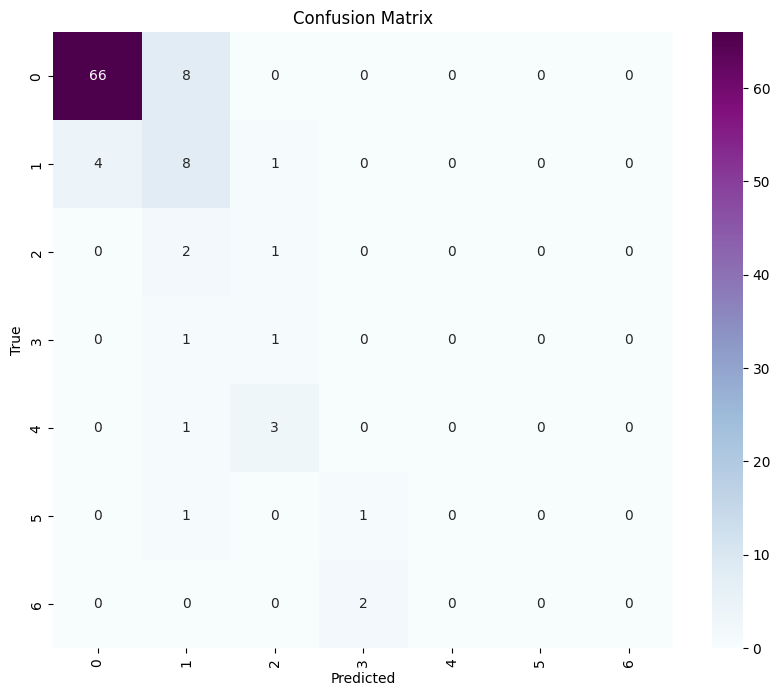

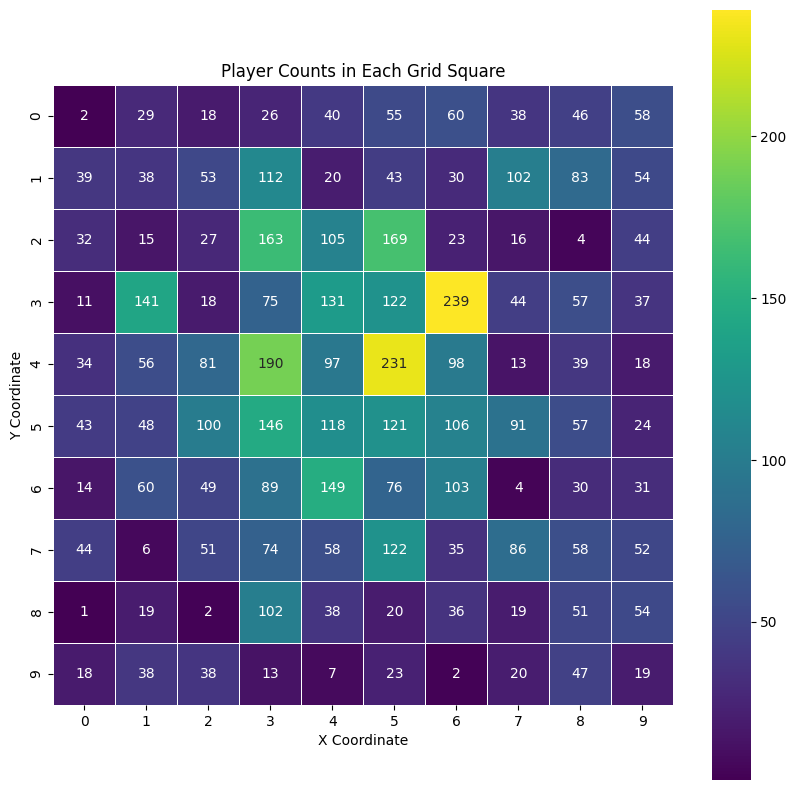

In [68]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                             learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
xgb_model.fit(X_train, y_train)
xgb_predictions = np.round(np.abs(xgb_model.predict(X_test)),0)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost MSE:", xgb_mse)

r2 = r2_score(y_test, xgb_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, xgb_predictions)

print('Total number of errors: ', np.sum(y_test != xgb_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == xgb_predictions) / len(y_test) * 100)




plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

player_counts = np.array([generate_random_value(cat) for cat in xgb_predictions])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = (player_counts.reshape(grid_shape))*n

plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

KNN MSE: 1.62
R-squared: 0.4030730682781237
Total number of errors:  23 in 100
Accuracy:  77.0


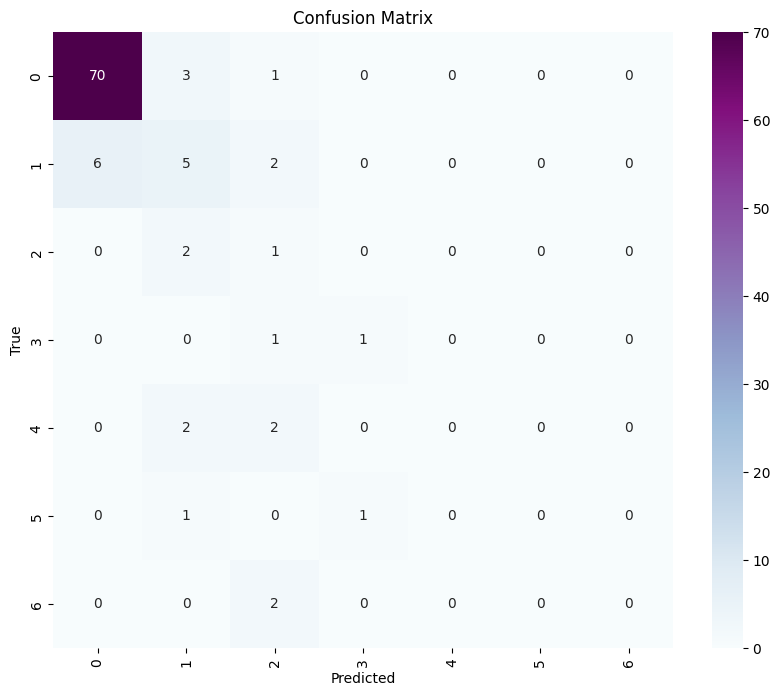

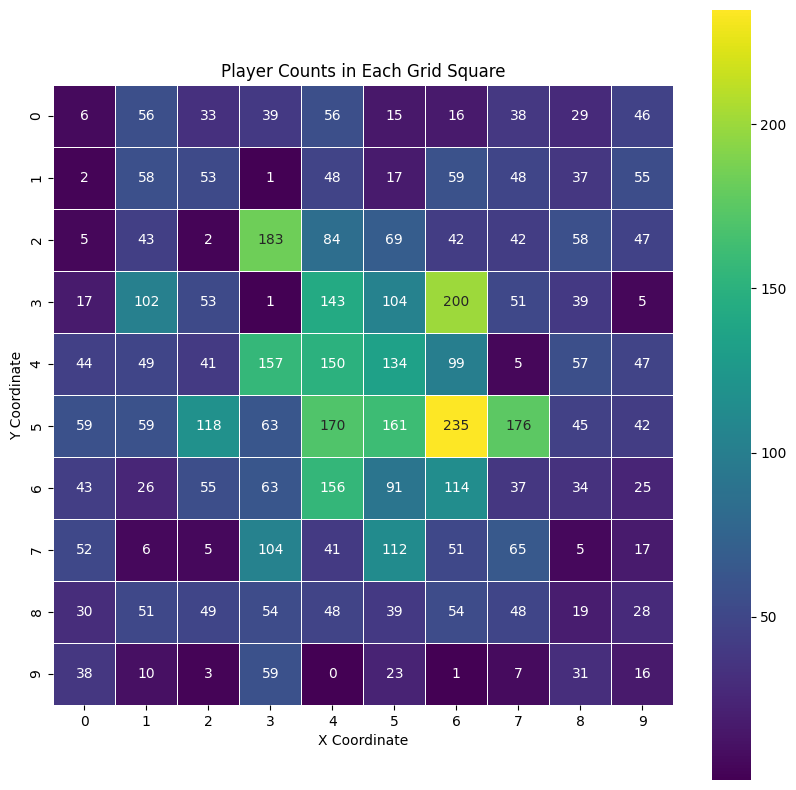

In [81]:
from sklearn.neighbors import KNeighborsRegressor

# KNN model
knn_model = KNeighborsRegressor(n_neighbors=11)
knn_model.fit(X_train, y_train)
knn_predictions = np.round(np.abs(knn_model.predict(X_test)),0)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
print("KNN MSE:", knn_mse)

r2 = r2_score(y_test, knn_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, knn_predictions)

print('Total number of errors: ', np.sum(y_test != knn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == knn_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


player_counts = np.array([generate_random_value(cat) for cat in knn_predictions])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = (player_counts.reshape(grid_shape))*n

plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


SVM MSE: 1.79
R-squared: 0.34043258778879104
Total number of errors:  21 in 100
Accuracy:  79.0


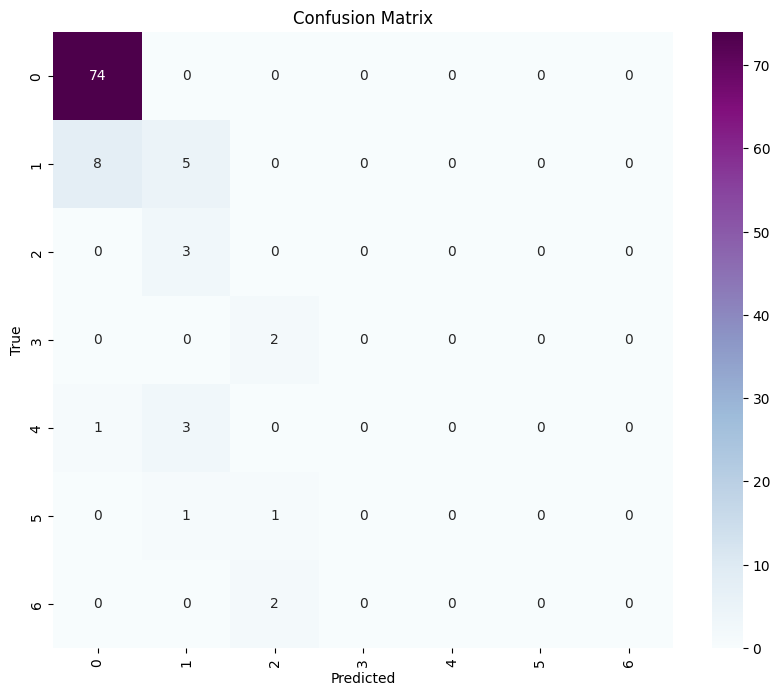

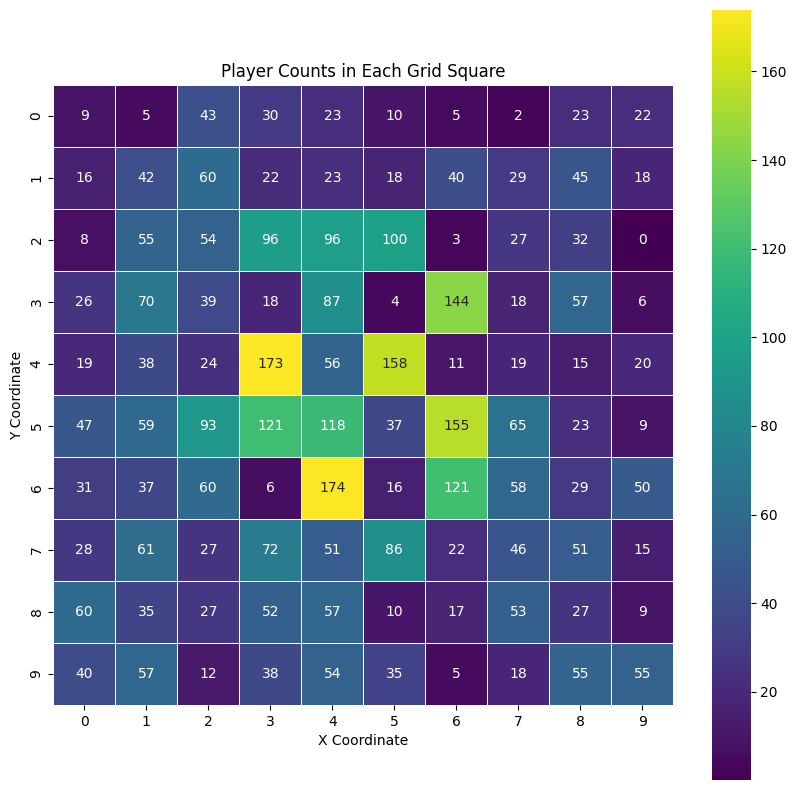

In [70]:
from sklearn.svm import SVR

# SVM model
svm_model = SVR(kernel='rbf')  # 'rbf' is the Radial Basis Function kernel
svm_model.fit(X_train, y_train)
svm_predictions = np.round(np.abs(svm_model.predict(X_test)),0)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_predictions)
print("SVM MSE:", svm_mse)

r2 = r2_score(y_test, svm_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, svm_predictions)

print('Total number of errors: ', np.sum(y_test != svm_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == svm_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()



player_counts = np.array([generate_random_value(cat) for cat in svm_predictions])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = (player_counts.reshape(grid_shape))*n

plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network model
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=3, activation='relu'))  # 100 neurons in the hidden layer
nn_model.add(Dense(10, input_dim=3, activation='relu'))  # 10 neurons in the hidden layer
nn_model.add(Dense(1, activation='linear'))  # Output layer
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=1000, batch_size=10)




Epoch 1/1000
10/10 [==============================] - 0s 11ms/step - loss: 2.1619
Epoch 2/1000
10/10 [==============================] - 0s 10ms/step - loss: 2.0870
Epoch 3/1000
10/10 [==============================] - 0s 9ms/step - loss: 2.0305
Epoch 4/1000
10/10 [==============================] - 0s 12ms/step - loss: 1.9704
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.9188
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8511
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.7838
Epoch 8/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.7238
Epoch 9/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.6671
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.6259
Epoch 11/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.5563
Epoch 12/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.5000
Epoch 13/1000
10/10 [=

Epoch 101/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8425
Epoch 102/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8320
Epoch 103/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8593
Epoch 104/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8414
Epoch 105/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8331
Epoch 106/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8260
Epoch 107/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8185
Epoch 108/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8173
Epoch 109/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8194
Epoch 110/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8245
Epoch 111/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8238
Epoch 112/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8216
Epoc

10/10 [==============================] - 0s 5ms/step - loss: 0.6661
Epoch 200/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6689
Epoch 201/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6613
Epoch 202/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6749
Epoch 203/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6711
Epoch 204/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6596
Epoch 205/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6963
Epoch 206/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6600
Epoch 207/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6670
Epoch 208/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6699
Epoch 209/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6561
Epoch 210/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6621
Epoch 211/1000
10/1

10/10 [==============================] - 0s 5ms/step - loss: 0.5973
Epoch 298/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6350
Epoch 299/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5972
Epoch 300/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6061
Epoch 301/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5929
Epoch 302/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6235
Epoch 303/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6348
Epoch 304/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6234
Epoch 305/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5990
Epoch 306/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6159
Epoch 307/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6108
Epoch 308/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5990
Epoch 309/1000
10/1

10/10 [==============================] - 0s 4ms/step - loss: 0.5663
Epoch 396/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5513
Epoch 397/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5444
Epoch 398/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5520
Epoch 399/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5587
Epoch 400/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5441
Epoch 401/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5404
Epoch 402/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5585
Epoch 403/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5584
Epoch 404/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5388
Epoch 405/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5740
Epoch 406/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5917
Epoch 407/1000
10/1

10/10 [==============================] - 0s 4ms/step - loss: 0.5056
Epoch 494/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5299
Epoch 495/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5010
Epoch 496/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4994
Epoch 497/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5029
Epoch 498/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5084
Epoch 499/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5024
Epoch 500/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5434
Epoch 501/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5023
Epoch 502/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5154
Epoch 503/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5021
Epoch 504/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5006
Epoch 505/1000
10/1

10/10 [==============================] - 0s 4ms/step - loss: 0.4430
Epoch 592/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4881
Epoch 593/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4528
Epoch 594/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4611
Epoch 595/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4448
Epoch 596/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4357
Epoch 597/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4541
Epoch 598/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4470
Epoch 599/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4315
Epoch 600/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4408
Epoch 601/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4519
Epoch 602/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4394
Epoch 603/1000
10/1

10/10 [==============================] - 0s 4ms/step - loss: 0.3873
Epoch 690/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3940
Epoch 691/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3871
Epoch 692/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4345
Epoch 693/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3852
Epoch 694/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3891
Epoch 695/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3954
Epoch 696/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4116
Epoch 697/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4015
Epoch 698/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4312
Epoch 699/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4058
Epoch 700/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3839
Epoch 701/1000
10/1

10/10 [==============================] - 0s 8ms/step - loss: 0.3595
Epoch 788/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3739
Epoch 789/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3528
Epoch 790/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3417
Epoch 791/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3495
Epoch 792/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3440
Epoch 793/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3375
Epoch 794/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3341
Epoch 795/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3443
Epoch 796/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3469
Epoch 797/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3367
Epoch 798/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.3441
Epoch 799/1000
10/1

10/10 [==============================] - 0s 4ms/step - loss: 0.3151
Epoch 886/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3428
Epoch 887/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.3115
Epoch 888/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3077
Epoch 889/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3014
Epoch 890/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3051
Epoch 891/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3125
Epoch 892/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2987
Epoch 893/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3019
Epoch 894/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2949
Epoch 895/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2977
Epoch 896/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.3021
Epoch 897/1000
10/1

10/10 [==============================] - 0s 4ms/step - loss: 0.2716
Epoch 984/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2728
Epoch 985/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2756
Epoch 986/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.2714
Epoch 987/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2655
Epoch 988/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2724
Epoch 989/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2761
Epoch 990/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2755
Epoch 991/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2714
Epoch 992/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2869
Epoch 993/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2898
Epoch 994/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.2983
Epoch 995/1000
10/1

4/4 [==============================] - 0s 3ms/step
Neural Network MSE: 0.69
R-squared: 0.7457533438962378
Total number of errors:  25 in 100
Accuracy:  75.0


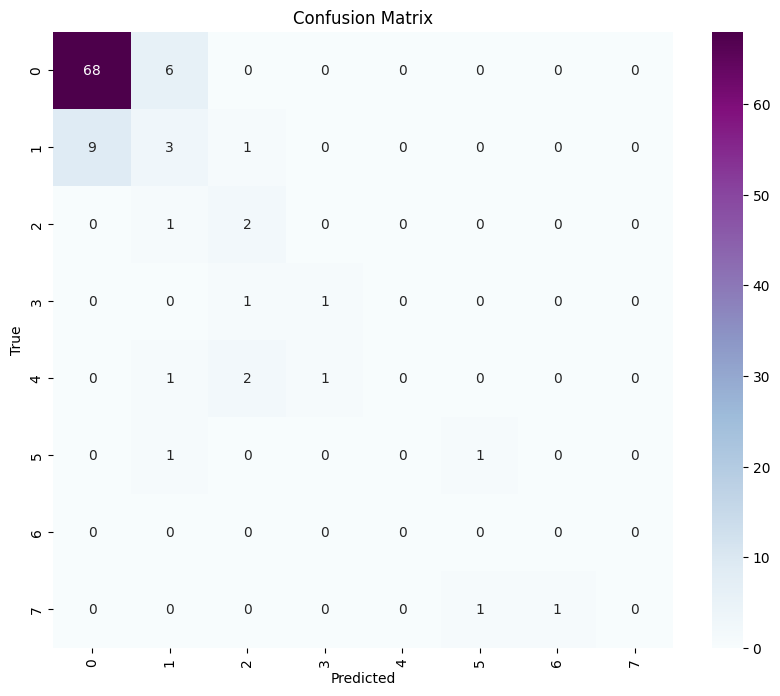

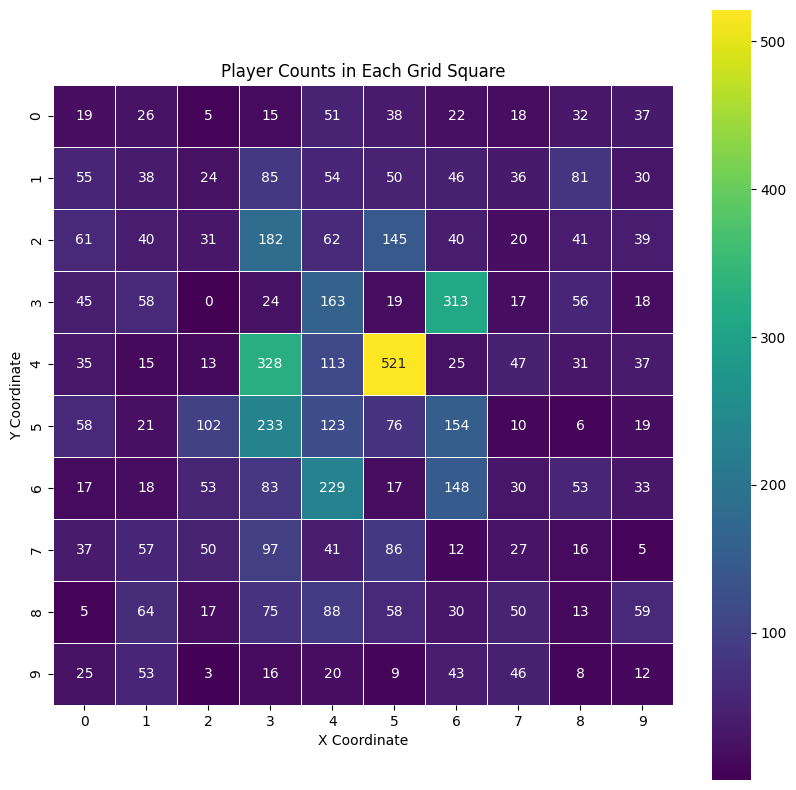

In [83]:
nn_predictions = np.round(np.abs(nn_model.predict(X_test)),0).flatten()
# Evaluate the model
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)


r2 = r2_score(y_test, nn_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, nn_predictions)

print('Total number of errors: ', np.sum(y_test != nn_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == nn_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()



player_counts = np.array([generate_random_value(cat) for cat in nn_predictions])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = (player_counts.reshape(grid_shape))*n

plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

Ridge Regression MSE: 2.1
R-squared: 0.22620582924941957
Total number of errors:  34 in 100
Accuracy:  66.0


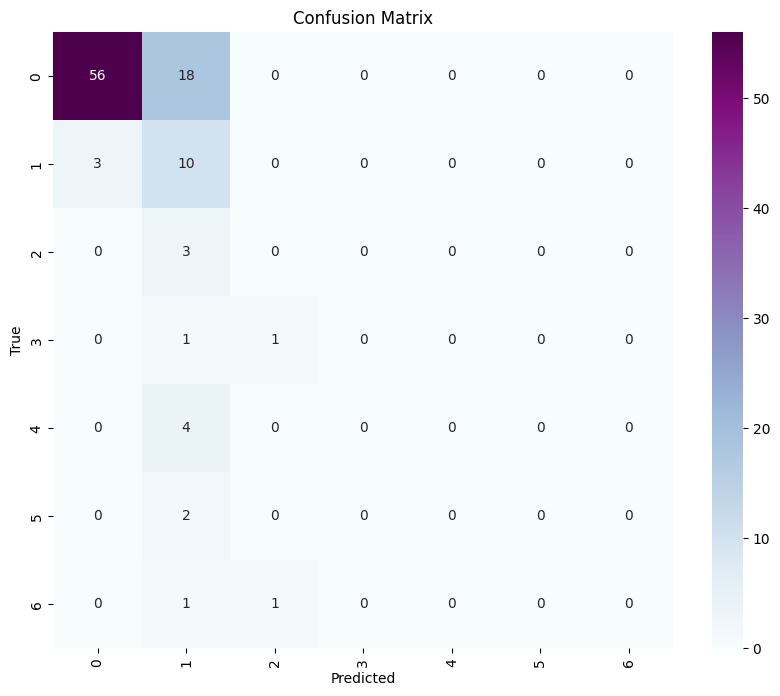

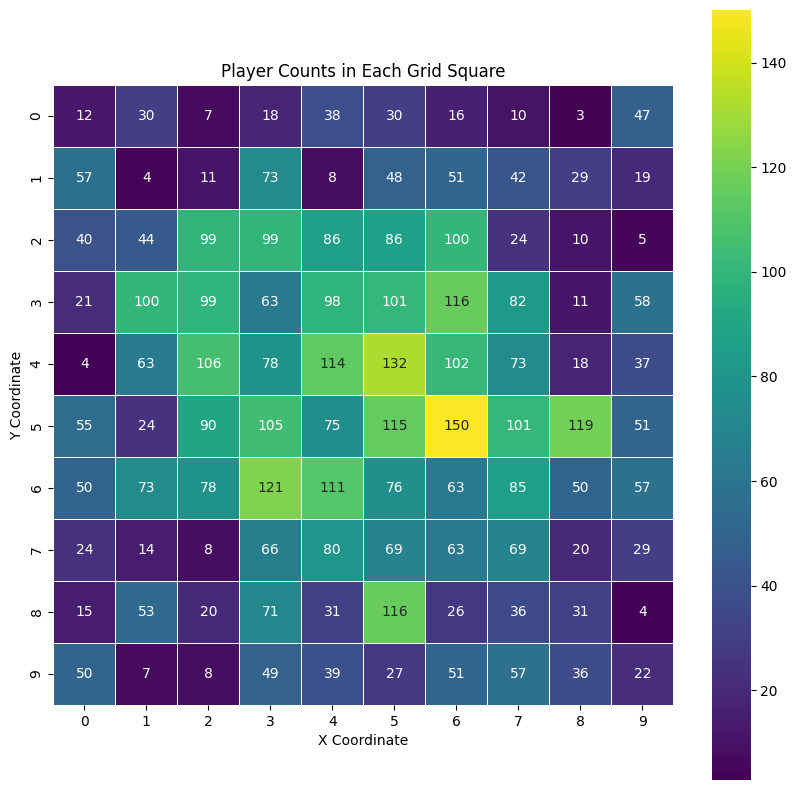

In [78]:
from sklearn.linear_model import Ridge

# Ridge Regression model
ridge_model = Ridge(alpha=3.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
ridge_predictions = np.round(np.abs(ridge_model.predict(X_test)),0)
# Evaluate the model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE:", ridge_mse)


r2 = r2_score(y_test, ridge_predictions)
print("R-squared:", r2)


cm = confusion_matrix(y_test, ridge_predictions)

print('Total number of errors: ', np.sum(y_test != ridge_predictions),'in', len(y_test))
print('Accuracy: ', np.sum(y_test == ridge_predictions) / len(y_test) * 100)



# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


player_counts = np.array([generate_random_value(cat) for cat in ridge_predictions])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = (player_counts.reshape(grid_shape))*n

plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample DataFrame (replace with your data)
# df = pd.read_csv('your_data.csv')

# Extracting features
features = ['Road_Count', 'Building_Count', 'Grid_Distance']
X = df[features]

# Standardizing the features (important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions as an example
principal_components = pca.fit_transform(X_scaled)

# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Resetting index of the original DataFrame to align with the new DataFrame
df.reset_index(drop=True, inplace=True)

# Adding 'Player_Count' back to the DataFrame, ensuring index alignment
df_pca['Player_Count'] = df['Player_Count']

# Now df_pca can be used for further analysis or modeling
print(df_pca)


In [ ]:

plt.figure(figsize=(10, 10))

# Using hexbin plot to show concentrations of player counts
plt.hexbin(df_pca['PC1'], df_pca['PC2'], gridsize=30, cmap='viridis', reduce_C_function=np.sum)

# Adding color bar to indicate player counts
plt.colorbar(label='Sum of Player Counts')

# Set labels and title
plt.title('Player Counts Distribution based on Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

In [23]:
# grid_data = np.zeros((10, 10))

# # Fill the array with player counts
# for (x, y), count in updated_3.items():
#     grid_data[y, x] = count
    
    
# # Assuming df is your DataFrame with 'X' and 'Y' being the coordinates
# # Calculate the point density
# xy = np.vstack([df['X'], df['Y']])
# z = gaussian_kde(xy)(xy)

# # Sort the points by density, so that the densest points are plotted last
# idx = z.argsort()
# x, y, z = df['X'][idx], df['Y'][idx], z[idx]


# # Normalize z for better color mapping
# z = (z - z.min()) / (z.max() - z.min())

KeyError: 'X'

In [ ]:


# Visualizations
plt.xlim(0,300)
new_df['DistanceToRoad'].hist(bins=100)
plt.show()

# Visualizations
new_df['BuildingCount'].hist(bins=100)
plt.show()

# Visualizations
plt.xlim(0,170)
new_df['Z'].hist(bins=100)
plt.show()


In [43]:
playerrr_count

(0, 0)    0.000000
(0, 1)    0.001037
(0, 2)    0.013997
(0, 3)    0.005875
(0, 4)    0.003974
            ...   
(9, 5)    0.002419
(9, 6)    0.002074
(9, 7)    0.000000
(9, 8)    0.000000
(9, 9)    0.000000
Name: Player_Count, Length: 100, dtype: float64

In [46]:
print(y_train)

(0, 0)    0
(0, 1)    0
(0, 2)    0
(0, 3)    0
(0, 4)    0
         ..
(9, 5)    0
(9, 6)    0
(9, 7)    0
(9, 8)    0
(9, 9)    0
Name: Player_Category, Length: 100, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]


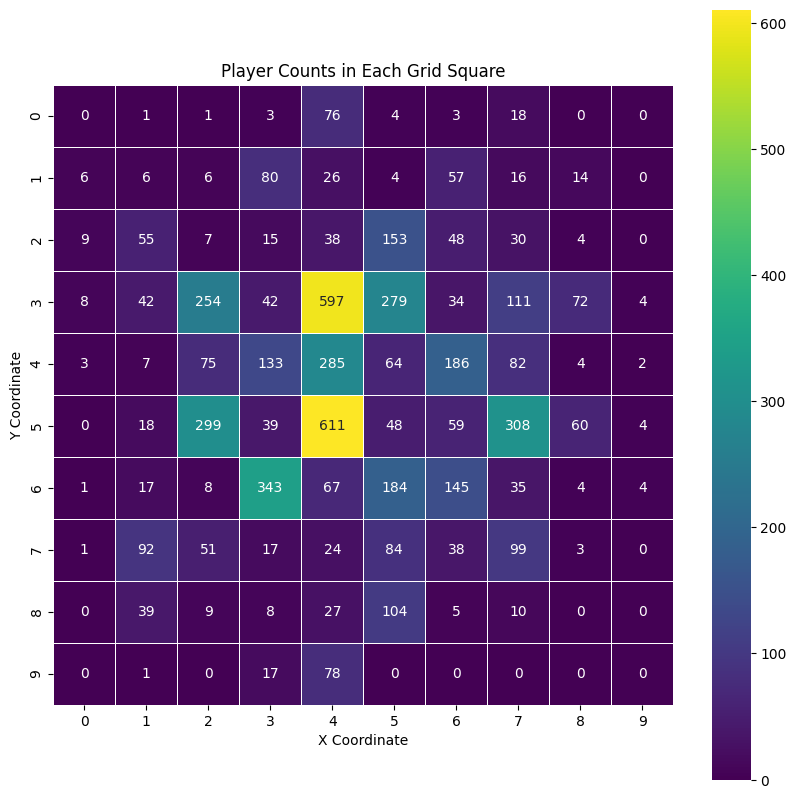

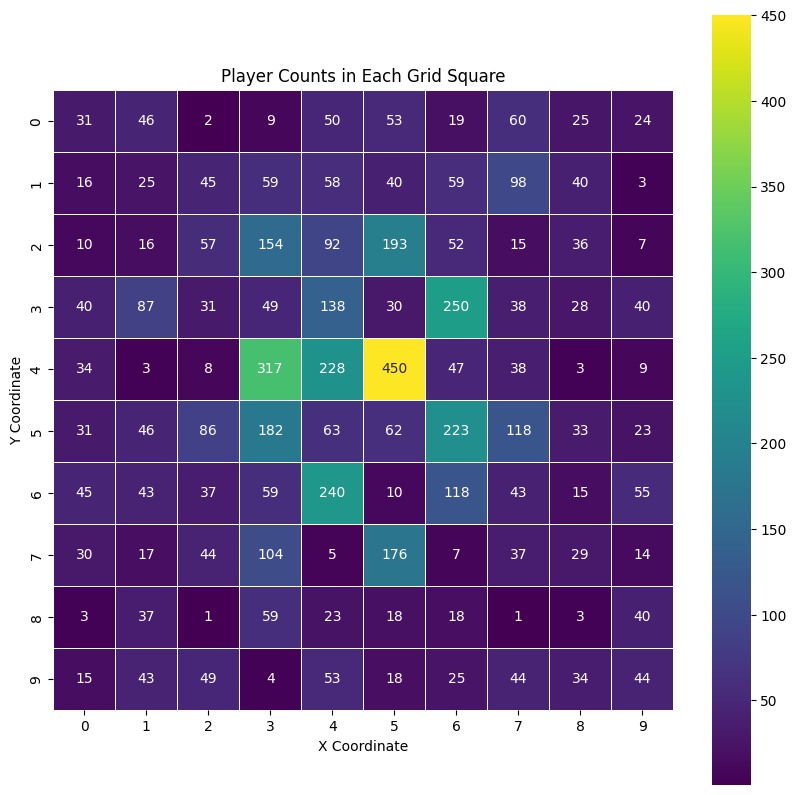

In [53]:
grid_data = np.zeros((10, 10))
a=0
# Fill the array with player counts
for (x, y), count in test_4.items():
    a+=count
    grid_data[y, x] = count

plt.figure(figsize=(10, 10))
sns.heatmap(grid_data, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)

# Set labels and title
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')




# Show the plot
plt.show()

player_counts = np.array([generate_random_value(cat) for cat in rf_predictions])
grid_shape = (grid_size, grid_size)  
player_counts_reshaped = player_counts.reshape(grid_shape)
player_counts_reshaped=player_counts_reshaped*n


plt.figure(figsize=(10, 10))
sns.heatmap(player_counts_reshaped, annot=True, fmt=".0f", cmap='viridis', linewidths=.5, square=True)
plt.title('Player Counts in Each Grid Square')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [ ]:
# Scatter plot for XY vs DistanceToRoad (as an example)
plt.scatter(new_df['XY'].apply(lambda xy: xy[0]), new_df['DistanceToRoad'])  # X coordinate vs DistanceToRoad
plt.show()

# Scatter plot for XY vs DistanceToRoad (as an example)
plt.scatter(new_df['XY'].apply(lambda xy: xy[1]), new_df['DistanceToRoad'])  # X coordinate vs DistanceToRoad
plt.show()


# Scatter plot for XY vs DistanceToRoad (as an example)
plt.scatter(new_df['XY'].apply(lambda xy: xy[0]), new_df['BuildingCount'])  # X coordinate vs DistanceToRoad
plt.show()

# Scatter plot for XY vs DistanceToRoad (as an example)
plt.scatter(new_df['XY'].apply(lambda xy: xy[1]), new_df['BuildingCount'])  # X coordinate vs DistanceToRoad
plt.show()

In [ ]:
import matplotlib.pyplot as plt



# Plotting the first 200 points from df_trajectory in blue
plt.scatter(df_trajectory['X'][:1000], df_trajectory['Y'][:1000], color='blue', label='df_trajectory')

# Plotting the entire df in red
plt.scatter(df['X'][:166], df['Y'][:166], color='red', label='df')

# Adding labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Player Positions')
plt.legend()

# Show the plot
plt.show()

